# This notebook is for the Course Project of IBM Introduction to Machine Learning Specialization

In [11]:
#importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(rc={'figure.figsize':(11.7,8.27)})
import statsmodels.api as sm

## *First Ask*


### Brief description of the dataset and a summary of its attributes

We will be working with a (transportation vehicelssales dataset for a variety of products, the dataset captures the quantities that were ordered, prices, dates of purchases, addresses to where those produtcs are shipped and name of the people who ordered the products. The following is a description of each column:

* **ordernumber**: unique id for each order that was made
* **quantityordered**: the quantity of products in each order
* **priceeach**: the price of each product in the order
* **orderlinenumber**: corresponds to the department it was ordered from
* **sales**: the revenues from the order
* **orderdate**: mm/dd/yyyy hh:mm
* **status**: status of the shipment
* **qtr_id**: the quarter in which the order was placed
* **month_id**: the month in which the order was placed
* **year_id**: the year in which the order was placed
* **productline**: type of product that was ordered (cars, motorcycles, trucks and buses...etc)
* **MSRP**: The list price, also known as the manufacturer's suggested retail price, or the recommended retail price, or the suggested retail price of a product is the price at which the manufacturer recommends that the retailer sell the product.
* **productcode**: code of the product that was ordered
* **customername**: name of the company that ordered the product
* **phone**: phone number of the company that ordered the product
* **addressline1**: the address to which the order will be shipped to
* **addressline2**: the address to which the order will be shipped to
* **city**:the city to which the order will be shipped to
* **state**: the state to which the order will be shipped to
* **postalcode**: the postalcode to which the order will be shipped to
* **country**: the country to which the order will be shipped to
* **territory**: the territory to which the order will be shipped to
* **contactlastname**: Last name of the person who made the order
* **contactfirstname**: First name of the person who made the order
* **dealsize**: Size of the deal

In [12]:
# The code was removed by Watson Studio for sharing.

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## *Second Ask*


### Initial plan for data exploration

The plan for the EDA will be straighforward, it will include multiple graphs (boxplots, pairblots, histograms, barplots,etc..) of the most importnat variables, checking for any anomalies and any strong patterns, which will ultimately help in building hypotheses about the dataset.

#### Fig1: Sales in each year by Product line

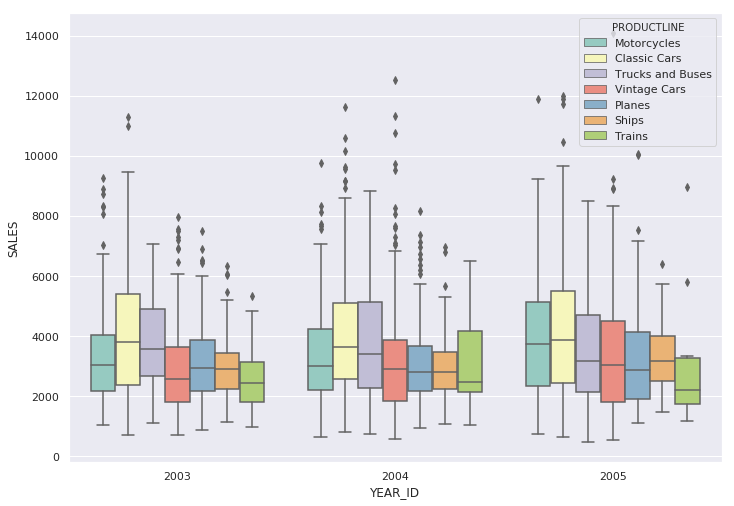

In [13]:
ax = sns.boxplot(x="YEAR_ID", y="SALES",hue='PRODUCTLINE', data=df, palette='Set3')

#### Fig2: Quantities ordered in each year by Product line

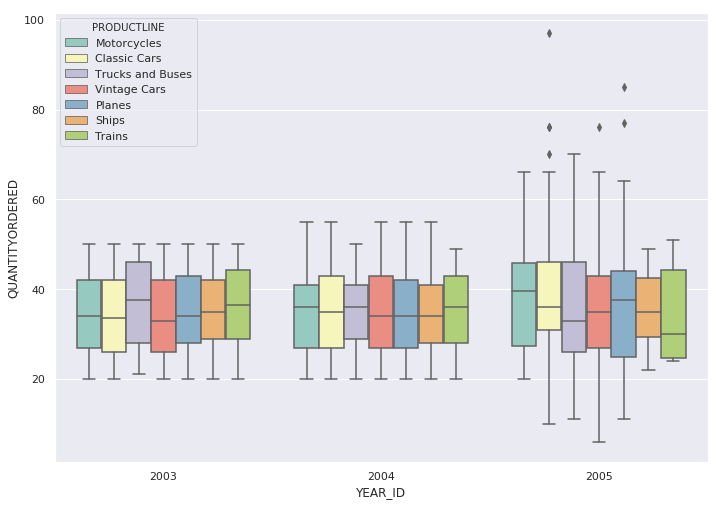

In [14]:
ax = sns.boxplot(x="YEAR_ID", y="QUANTITYORDERED",hue='PRODUCTLINE', data=df, palette='Set3')

#### Fig3: Yearly Sales (aggregates)

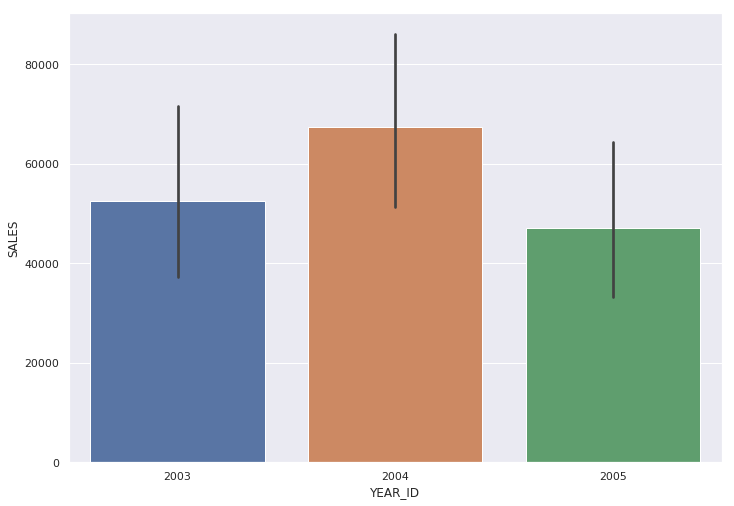

In [15]:
df_1 = df.groupby(['PRODUCTLINE','QTR_ID','YEAR_ID','DEALSIZE'])['SALES','QUANTITYORDERED'].sum()
df_1 = df_1.reset_index()
sns.barplot(x='YEAR_ID',y='SALES',data=df_1)

#### Fig4: Yearly Sales (aggregate) by product line

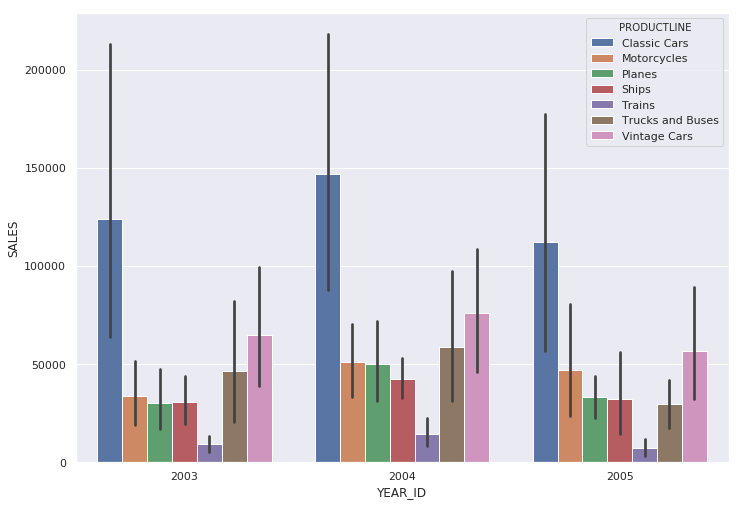

In [16]:
sns.barplot(x='YEAR_ID',y='SALES',hue='PRODUCTLINE',data=df_1)

#### Fig5: Yearly sales (aggregated over quarters)

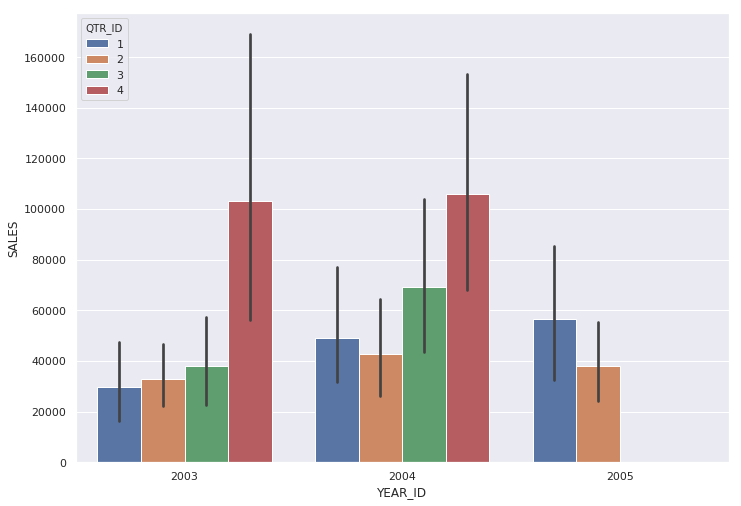

In [17]:
sns.barplot(x='YEAR_ID',y='SALES',hue='QTR_ID',data=df_1)

#### Fig6: Yearly sales (aggregate) by deal size

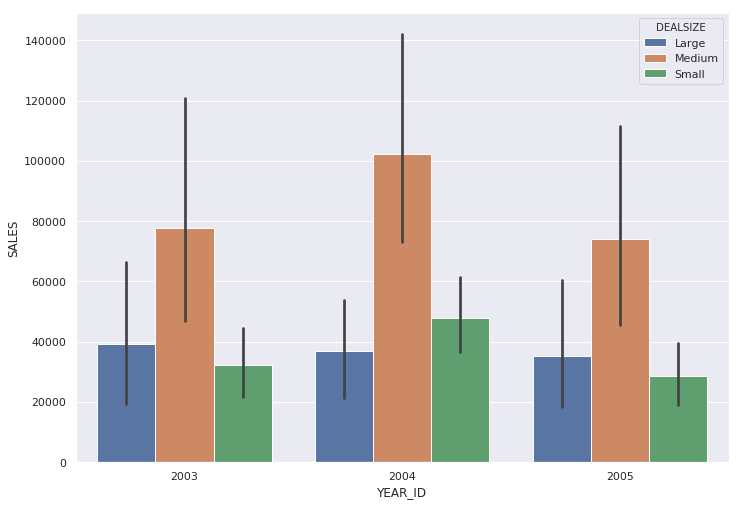

In [18]:
sns.barplot(x='YEAR_ID',y='SALES',hue='DEALSIZE',data=df_1)

#### Fig7: Yearly quantities ordered (aggregate) by deal size

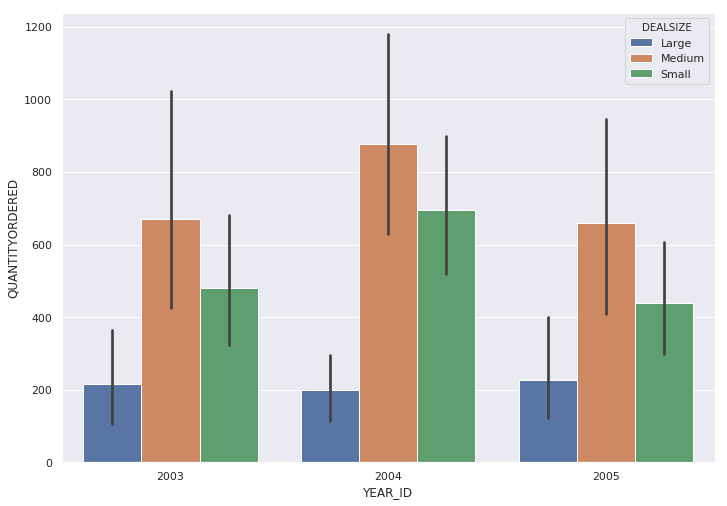

In [19]:
sns.barplot(x='YEAR_ID',y='QUANTITYORDERED',hue='DEALSIZE',data=df_1)

#### Fig8: Distrubtion of sales

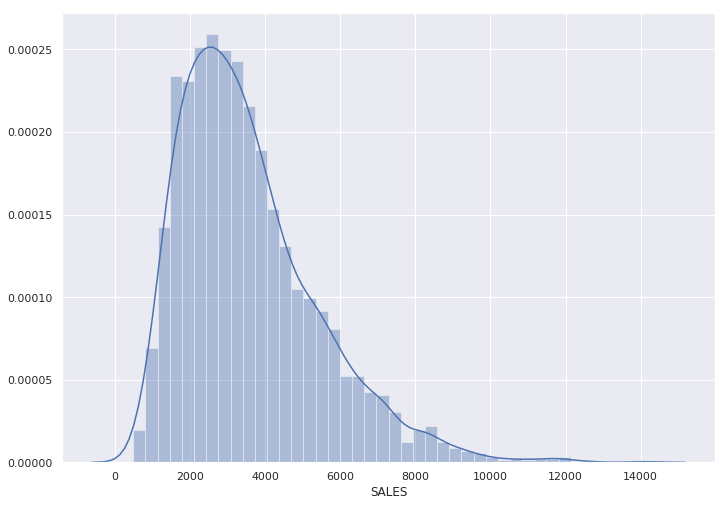

In [20]:
sns.distplot(df['SALES'])

#### Fig9: Boxplots of sales by territory and product line

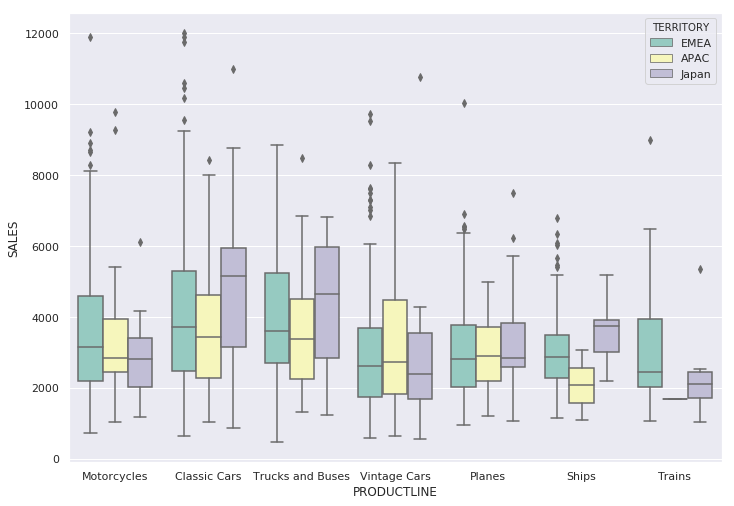

In [21]:
ax = sns.boxplot(x="PRODUCTLINE", y="SALES", hue="TERRITORY", data=df, palette="Set3")

#### Fig10:  Sales (aggregate) by territory and dealsize

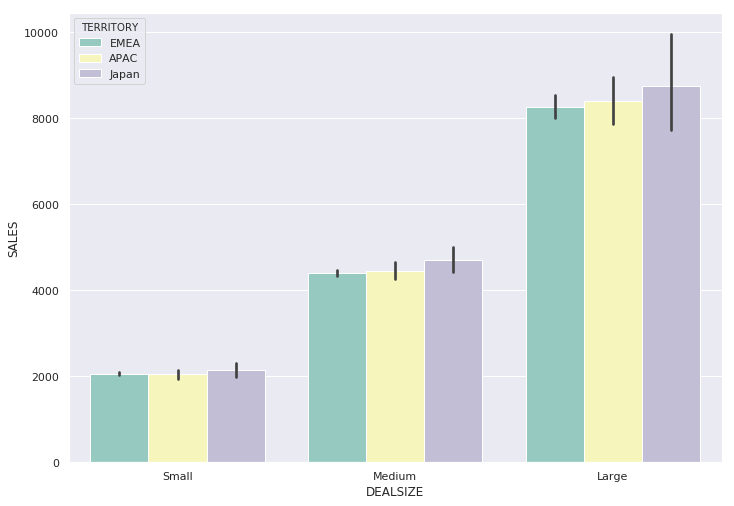

In [22]:
sns.barplot(x="DEALSIZE", y="SALES", hue="TERRITORY", data=df, palette="Set3")

#### Fig11:  Average yearly sales 

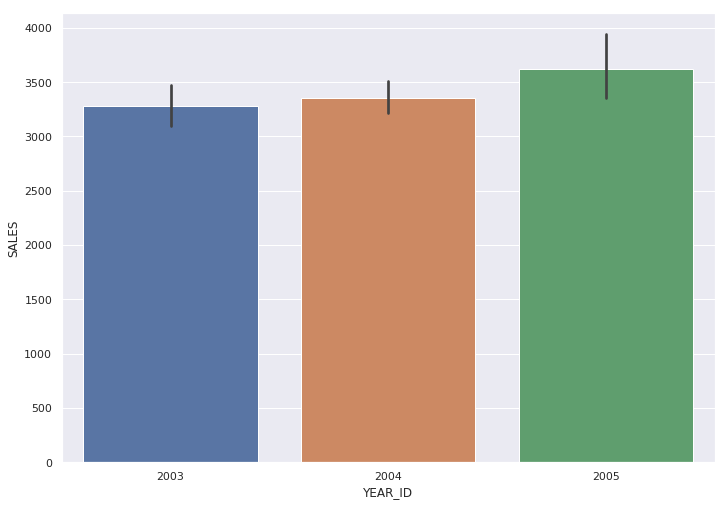

In [23]:
df_2 = df.groupby(['PRODUCTLINE','QTR_ID','YEAR_ID'])['SALES','QUANTITYORDERED'].mean()
df_2 = df_2.reset_index()
sns.barplot(x='YEAR_ID',y='SALES',data=df_2)

#### Fig12:  Average yearly sales by product line

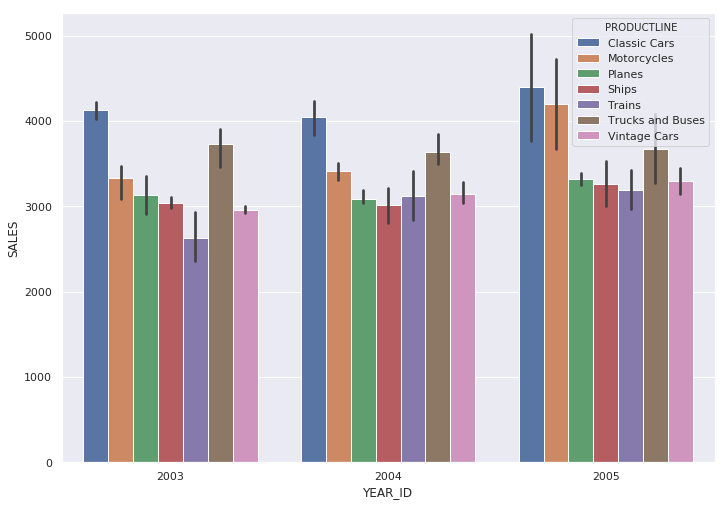

In [24]:
sns.barplot(x='YEAR_ID',y='SALES',hue='PRODUCTLINE',data=df_2)

#### Fig13:  Average quarterly sales in each year

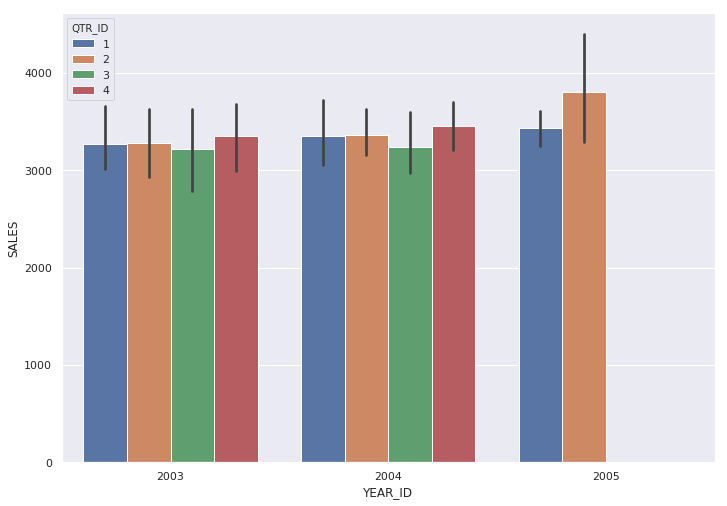

In [25]:
sns.barplot(x='YEAR_ID',y='SALES',hue='QTR_ID',data=df_2)

#### Fig11:  Quarterly sales in each year by deal size

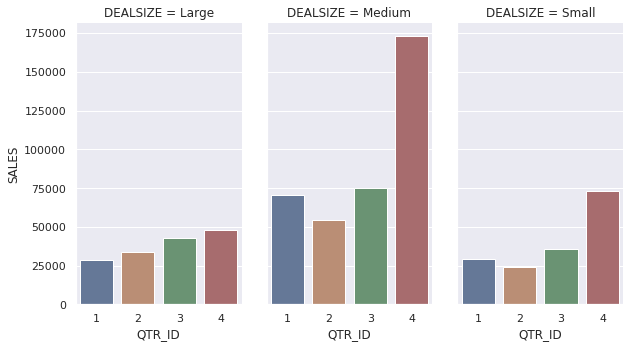

In [26]:
 g = sns.catplot(x="QTR_ID", y="SALES", col="DEALSIZE",data=df_1, saturation=.5, kind="bar", ci=None, aspect=.6)

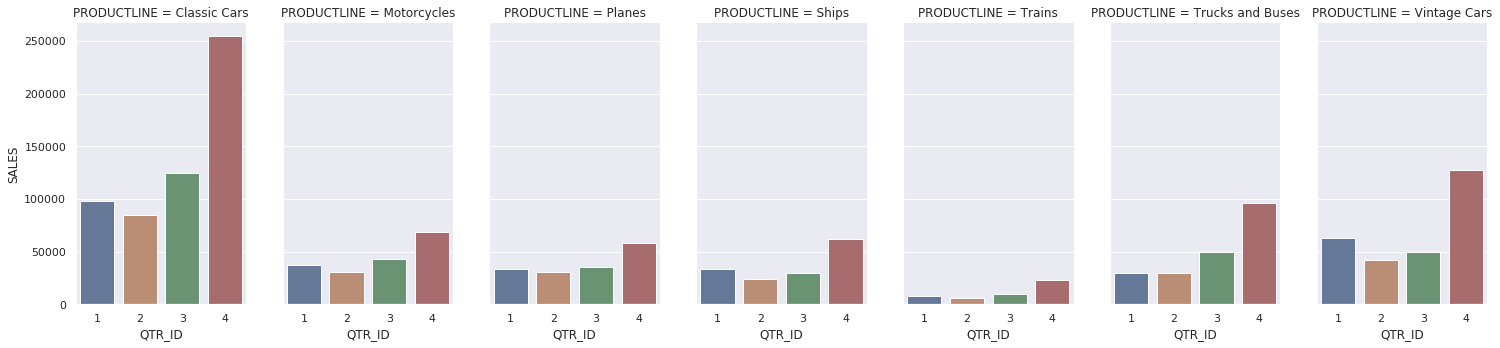

In [27]:
 g = sns.catplot(x="QTR_ID", y="SALES", col="PRODUCTLINE",data=df_1, saturation=.5, kind="bar", ci=None, aspect=.6)

## *Third Ask*

### Actions taken for data cleaning and feature engineering

The dataframe is fairly clean and organized and needs little to none in terms of feature engineering. The actions taken for data cleaning are changing categorical/ordinal variables to numerical represenations, namely, **STATUS** and **DEALSIZE**. We can scale the dataframe for the variables of interest once a model is determined, given that some models (like classifiers) don't need any scaling, in other words, at this stage, scaling won't be needed.

In [28]:
df['STATUS'].replace(to_replace=['Cancelled','Diputed','In','Process','On Hold','Resolved','Shipped'], 
                     value=[0,1,2,3,4,5,6],inplace=True)
df['DEALSIZE'].replace(to_replace=['Small','Medium','Large'], 
                     value=[0,1,2],inplace=True)

In [29]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,6,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,0
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,6,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,0
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,6,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,1
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,6,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,1
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,6,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,1


## *Fourth Ask*

### Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

* Yearly sales and quantities ordered (by product line) fall almost in the same ranges, they also have approxiamtely the same medians except for classic cars where surpass the rest of the others. 
* We see a lot of outliers in the first graph for sales, this might be due to the sale of unique cars in their respective categories.
* We see a drop in sales betweeen the year 2004 and 2005, this drop is not driven by an equivalent one in a/certain produc line/s, however, it is mainly driven by lack of data in Q3 & Q4 in 2005 
* In terms of deal sizes, when looked at sales and the quantities ordered in each category, medium sales reins supreme over the other two (small and large)
* The sales are normally distributed with a positive skew, the mean hovers around 3000 and the median around 2400.
* When looking at territories, we see that Japan leads the trend in terms of the value of generated sales by a thin margin, this is also reflected in **Fig9** where the breakdown of sales by product line and territory is shown
* In terms of average yearly sales, the year 2005 tops the other two, this might be due to an increase in prices, especially in the (classic cars and motorcycles) product lines.
* It is noticable that Q4 is a good season for all product lines as we see big jump in that quarter for all categories

## *Fifth Ask*

### Formulating at least 3 hypothesis about this data

* **First Hypothesis**: Average sales are equal to 2500 in the given 3 years
* **Second Hypothesis**: Proportion of calssic cars' sales in 2003 to motorcycles is equal to that in 2004
* **Third Hypothesis**: Average sales of motorcycles in 2004 is equal to that in 2005

## *Sixth Ask*

### Conducting a formal significance test for one of the hypotheses and discuss the results

We will selec the first hypothesis for testing:

**Null** or **H0**: Average sales = 3000

**Alternative** or **Ha**: Average sales > 3000

We set the p-value at 5% or 0.05, so that any value which is larger than 0.05 will yield a failure to reject the null hypothesis, in other words, we have no evidence against the null hypothesis. If the estimated p-value is lower than the set threshold then we will reject the null hypothesis and conclude that average sales is larger than 3000.

##### Setting up the variables to perform the hypothesis testing

In [30]:
n = len(df)
mean = df['SALES'].mean()
sd = df['SALES'].std()
(n,mean,sd)

(2823, 3553.88907190932, 1841.8651057401805)

##### Performing the hypothesis test

In [31]:
sm.stats.ztest(df['SALES'], value = 3000, alternative = 'larger')

(15.977926372238278, 9.105181988023085e-58)

The p-value obtained from the output of the function above is (9.105181988023085e-58) << 0.05, this means that we have a strong evidence against the null hypothesis and that the average sales does not equal 3000 and is always higher than 3000.

## *Seventh Ask*

### Suggestions for next steps in analyzing this data

The use of the sales dataset in this notebook could be extended to ML algorithms. This can be achieved through, first, deciding what machine learning algorithm or technique will be used (depending on the question we are after e.g. classification, prediction, etc..), second, transforming the data if needed (e.g. scaling the data), third, choosing the features that relevant to the ML algo, finally, running the algorithm on the features set and validating the results. 

## *Eighth Ask*

### A paragraph that summarizes the quality of this data set and a request for additional data if needed

The dataset was obtained from Kaggle, the overall quality was pretty good, except for the data missing for Q3 and Q4 in the year of 2005, although this might be attributed to the fact that this dataset was maybe capturing infromation till Q2-2005, this was not mentioned anywhere. 

Other data points that could have been helpful are information about the service providers responsible for shipping, where it can be paired with the status of shipment column to study that part of the business. 

Also, more detailed data about the customers (e.g. size of their companies, industries they work in, whether they work internationlly or locally or regionally, etc...) to pair that with their purchasing behavior and create more comprehensive profiles for those companies. This will ultimately help in more targeted sales efforts.